In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv', sep=",", encoding = "ISO-8859-1")

In [3]:
df = data.copy()

In [4]:
df.shape

(49320, 22)

In [24]:
df.head()

id  LoanNr_ChkDgt                            Name         City  \
0  d30838cf806     6340864010  QUALITY DOCUMENT SOLUTIONS INC       ODESSA   
1  14560b856a6     1670916004  ATLANTIC INDUSTRIAL WOOD PRODU       KELLER   
2  051e5c3899f     7568313003              C J TREEHOUSE INC.      EL PASO   
3  eb223b05ea8     4585814005                        WINGSTOP  SAN ANTONIO   
4  c80c89ac964     2003866003      H & H MACHINE & SUPPLY INC       ODESSA   

  State                         Bank BankState ApprovalDate ApprovalFY  NoEmp  \
0    TX  WELLS FARGO BANK NATL ASSOC        SD    22-May-03       2003     10   
1    TX  WELLS FARGO BANK NATL ASSOC        CA     7-Apr-06       2006      1   
2    TX   BANK OF AMERICA NATL ASSOC        TX    12-Sep-94       1994      5   
3    TX                 COMPASS BANK        AL    18-Jun-01       2001      1   
4    TX               SOUTHWEST BANK        TX    12-May-06       2006      5   

   ...  RetainedJob  FranchiseCode  UrbanRural  RevLineCr  LowDoc ChgOffDate  \
0  ...           10              1           1          0       N        NaN   
1  ...            1              1           1          Y       N        NaN   
2  ...            0              1           0          N       Y        NaN   
3  ...            1          89769           1          0       N        NaN   
4  ...            5              1           1          0       N        NaN   

  DisbursementDate DisbursementGross BalanceGross Accept  
0        30-Jun-03      $150,000.00        $0.00       1  
1        31-Jul-06      $250,000.00        $0.00       1  
2        31-Oct-94       $53,000.00        $0.00       1  
3        31-Aug-01      $170,000.00        $0.00       1  
4        31-May-06      $121,000.00        $0.00       1  

[5 rows x 22 columns]

In [115]:
df['City'] = df['City'].values.astype(str)

In [116]:
df.dtypes

id                    object
LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Bank                  object
BankState             object
ApprovalDate          object
ApprovalFY            object
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
Accept                 int64
dtype: object

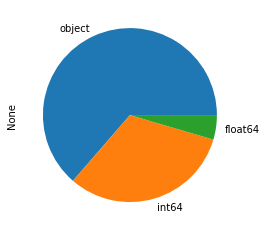

In [69]:
df.dtypes.value_counts().plot.pie()

There are many data with types "Object"

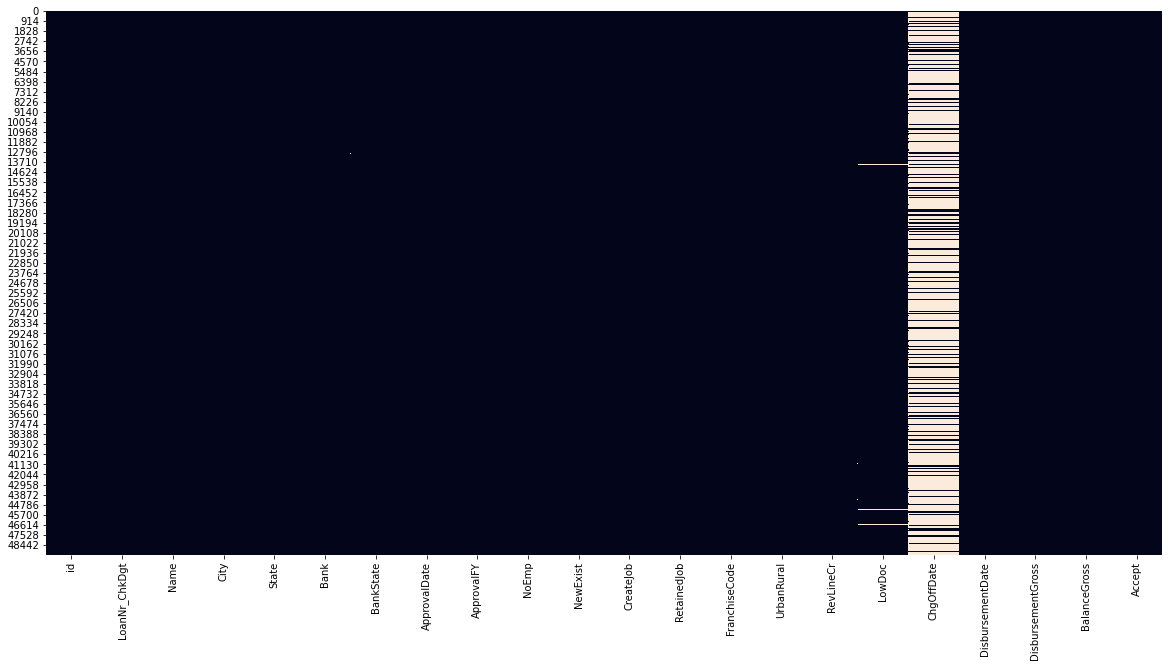

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [71]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

id                   0.000000
DisbursementGross    0.000000
UrbanRural           0.000000
FranchiseCode        0.000000
RetainedJob          0.000000
CreateJob            0.000000
BalanceGross         0.000000
NoEmp                0.000000
Accept               0.000000
ApprovalDate         0.000000
State                0.000000
City                 0.000000
LoanNr_ChkDgt        0.000000
ApprovalFY           0.000000
Name                 0.000020
NewExist             0.000142
DisbursementDate     0.002555
LowDoc               0.003244
BankState            0.004055
Bank                 0.004055
RevLineCr            0.005860
ChgOffDate           0.805941
dtype: float64

We can delete the column "ChgOffDate" because 80% is NaN

In [72]:
df.drop(['ChgOffDate'], axis=1, inplace=True)

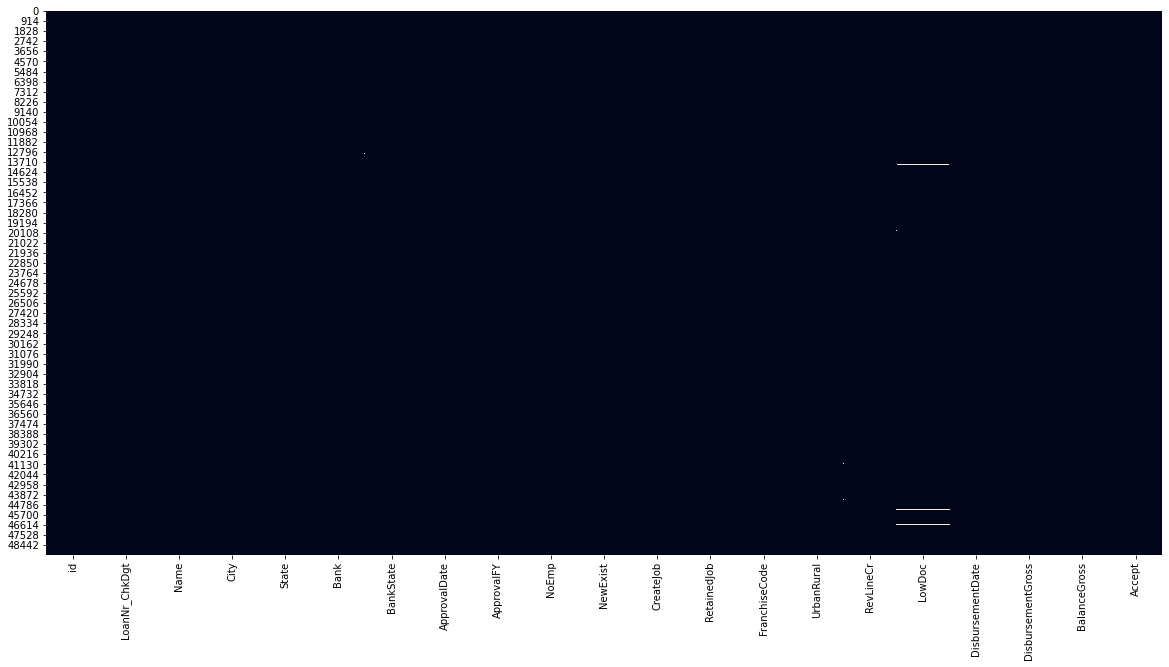

In [73]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [74]:
df['Accept'].value_counts(normalize=True)

1    0.810929
0    0.189071
Name: Accept, dtype: float64

We can see that there are a lot of accepted, almost 81 % of the dataset.

In [75]:
df_categorical = df.select_dtypes('object')

In [76]:
categorical_columns = df_categorical.columns

In [77]:
df_categorical.columns

Index(['id', 'Name', 'City', 'State', 'Bank', 'BankState', 'ApprovalDate',
       'ApprovalFY', 'RevLineCr', 'LowDoc', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross'],
      dtype='object')

In [79]:
df.columns

Index(['id', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Bank', 'BankState',
       'ApprovalDate', 'ApprovalFY', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'Accept'],
      dtype='object')

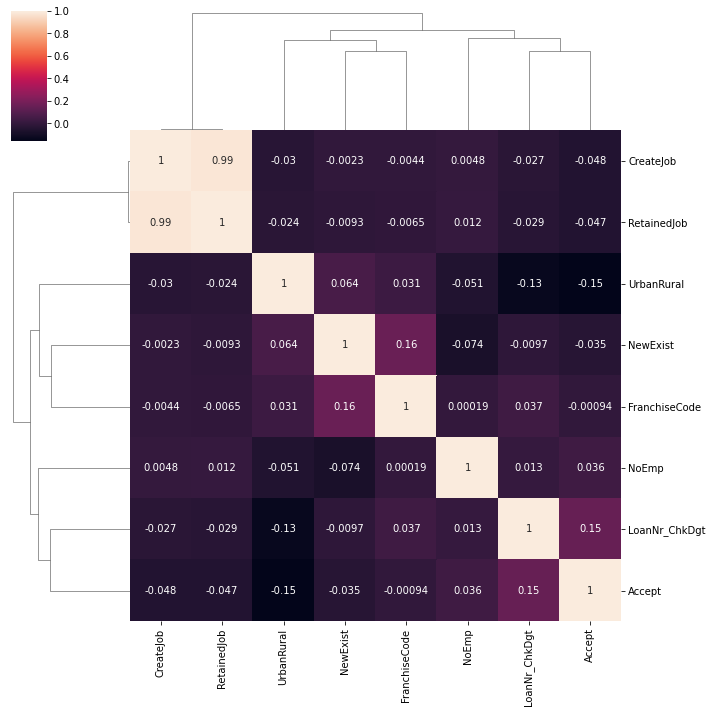

In [80]:
data.corr()
corrMatrix = data.corr()
sns.clustermap(corrMatrix, annot=True)
plt.show()

D:\Annaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Annaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


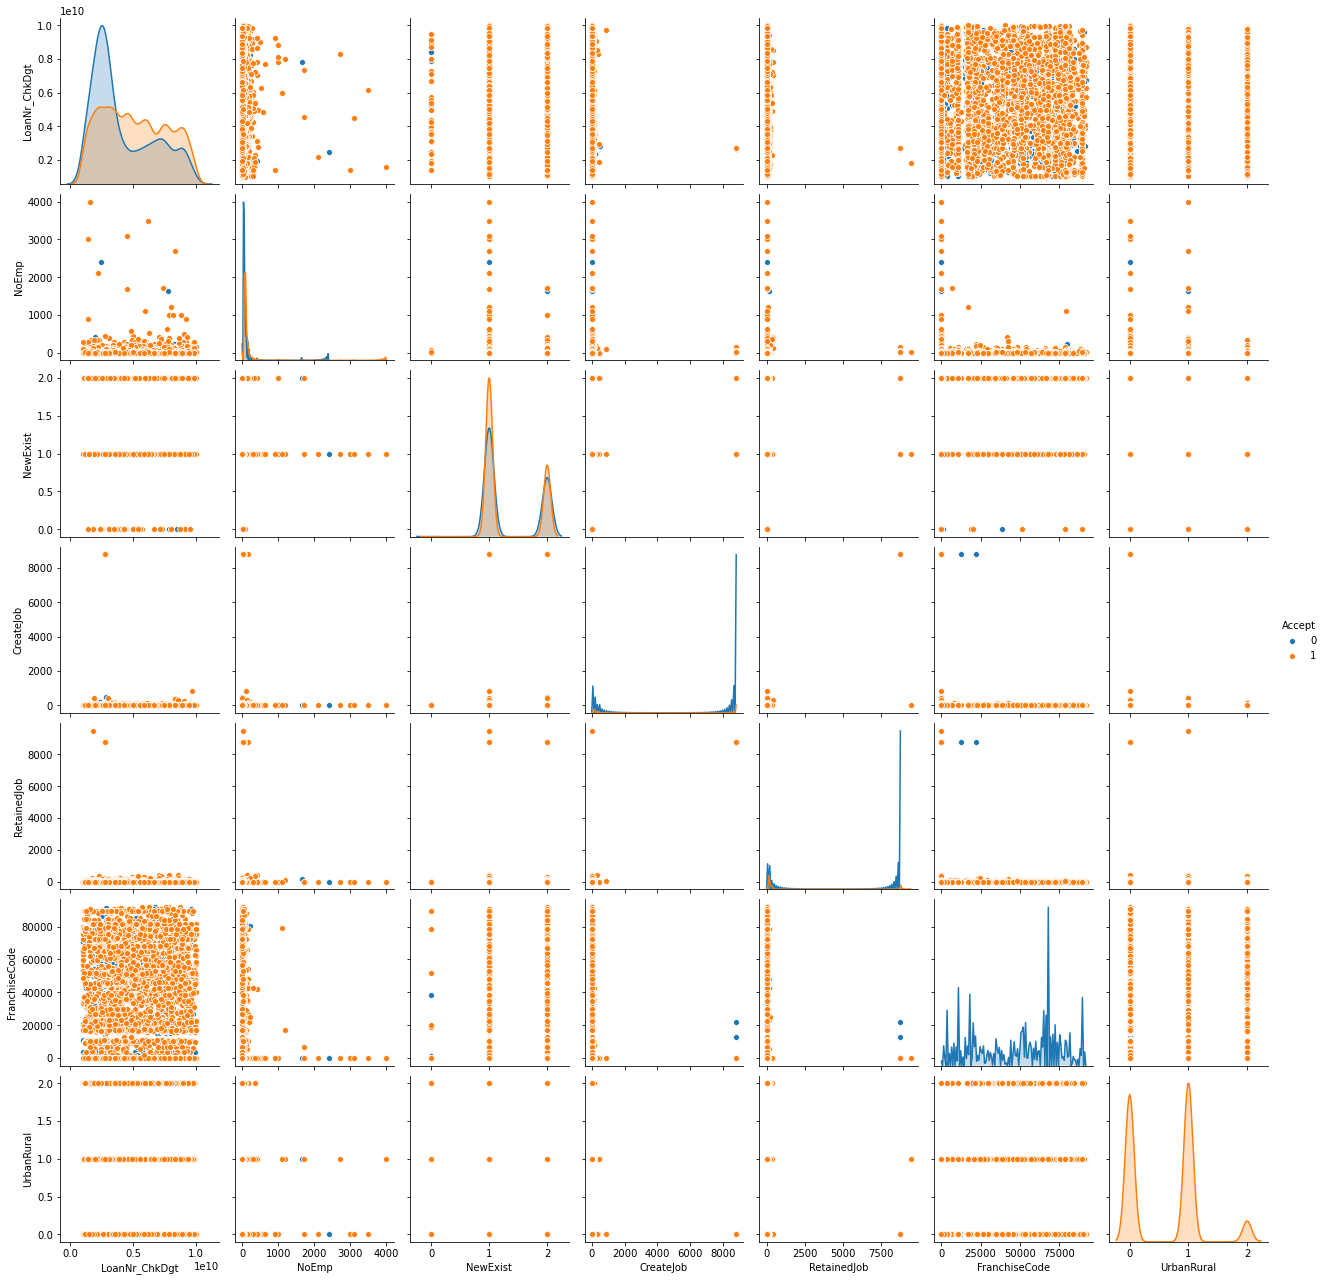

In [81]:
sns.pairplot(df,hue='Accept')

In [82]:
pd.crosstab(df['Bank'], df['Accept'])

Accept                           0   1
Bank                                  
1ST BANK, NATIONAL ASSOCIATION   1   0
1ST CHOICE BANK                  0   3
1ST COMMERCIAL CAPITAL           4   2
1ST COMMUNITY FCU                0   3
1ST LIB NATL BK                  0   1
...                             ..  ..
YELLOWSTONE BANK                 1   0
YOAKUM NATIONAL BANK             0   3
ZAPATA NATIONAL BANK             3   1
ZAVALA COUNTY BANK               0   1
ZIONS FIRST NATIONAL BANK       12  48

[685 rows x 2 columns]

In [83]:
df.describe()

LoanNr_ChkDgt         NoEmp      NewExist     CreateJob   RetainedJob  \
count   4.932000e+04  49320.000000  49313.000000  49320.000000  49320.000000   
mean    4.941161e+09     10.794505      1.317361      9.871006     11.930211   
std     2.530125e+09     44.645641      0.467497    262.815556    266.334776   
min     1.000254e+09      0.000000      0.000000      0.000000      0.000000   
25%     2.731376e+09      2.000000      1.000000      0.000000      0.000000   
50%     4.598009e+09      4.000000      1.000000      0.000000      0.000000   
75%     7.141562e+09     10.000000      2.000000      1.000000      3.000000   
max     9.995563e+09   4000.000000      2.000000   8800.000000   9500.000000   

       FranchiseCode    UrbanRural        Accept  
count   49320.000000  49320.000000  49320.000000  
mean     3933.928062      0.658942      0.810929  
std     15141.332203      0.595339      0.391569  
min         0.000000      0.000000      0.000000  
25%         1.000000      0.000000      1.000000  
50%         1.000000      1.000000      1.000000  
75%         1.000000      1.000000      1.000000  
max     92000.000000      2.000000      1.000000

In [84]:
pd.crosstab(df['Name'], df['Accept'])

Accept                        0  1
Name                              
"ALEXANDRA G" SHRIMP TRAWLER  1  0
"CINDY NAN" F/V               0  1
"CLIMB" ENTERPRISES, INC.     0  1
"DOC'S FOOD STORE"            0  1
"HOOT" GIBSON SALES CO.       1  0
...                          .. ..
olga serna                    1  0
parallax Services Inc.        0  1
the Emerald I Group L L C     1  0
tim danielewicz               1  0
wirepro, inc.                 0  1

[44761 rows x 2 columns]

In [85]:
df_accepted = df[df['Accept'] == 1]
df_refused = df[df['Accept'] == 0]

D:\Annaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Annaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Annaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Annaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


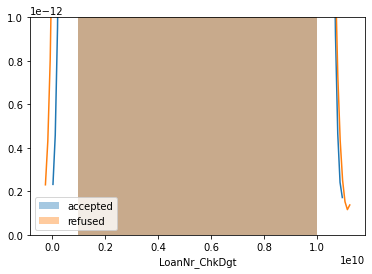

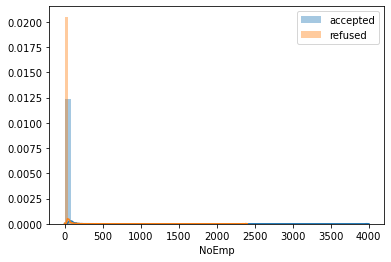

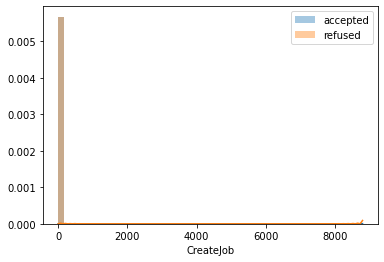

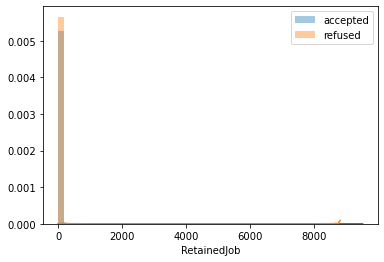

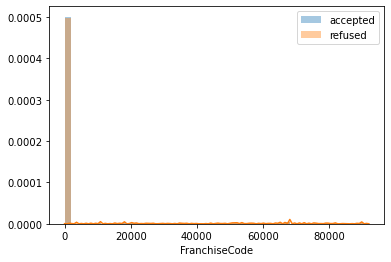

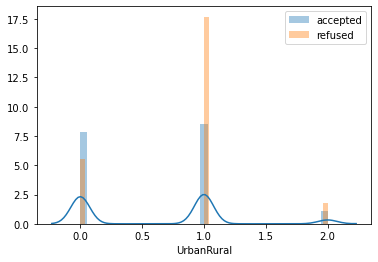

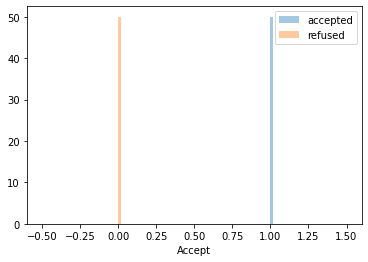

In [86]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df_accepted[col], label='accepted')
    sns.distplot(df_refused[col], label='refused')
    plt.legend()

We can see that when UrbanRural is equal to 1 there are many refused!

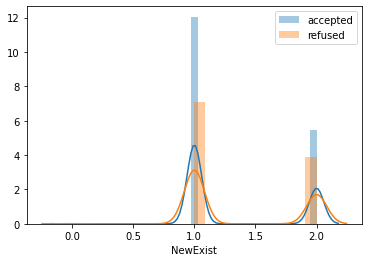

In [87]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df_accepted[col], label='accepted')
    sns.distplot(df_refused[col], label='refused')
    plt.legend()

In [117]:
df.var()

LoanNr_ChkDgt    6.401534e+18
NoEmp            1.993233e+03
NewExist         2.185534e-01
CreateJob        6.907202e+04
RetainedJob      7.093421e+04
FranchiseCode    2.292599e+08
UrbanRural       3.544285e-01
Accept           1.533265e-01
dtype: float64

### encodage

In [89]:
df_encodage = data.copy()

In [90]:
df_encodage.drop(['ChgOffDate'], axis=1, inplace=True)

In [91]:
df_encodage.dtypes

id                    object
LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Bank                  object
BankState             object
ApprovalDate          object
ApprovalFY            object
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
Accept                 int64
dtype: object

Como faltan muy pocos datos, decidimos eliminar las filas con valores perdidos para no cambiar la realidad.

## Creation of a function that changes strings into Integer

In [10]:
df_test_3 =df.copy()

We record the names of the banks in "name_bank" then we associate to each bank a number 

In [11]:
name_bank = []

lista = dict()

for i in range (0, 49320):
    
    name_bank.append(df['Bank'][i])
    
for j in range (0, 49320):
        
    if df['Bank'][j] not in lista:
        
        
        c = name_bank[j]
        
        df['Bank'][j] = j
    
        lista[c] = j
        
        print(c)
        
        print(df['Bank'][j])
        
        print(lista)
        
    else :
        
        df['Bank'][j] = lista[df['Bank'][j]]
    


<ipython-input-11-e1d91e87289b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bank'][j] = j
<ipython-input-11-e1d91e87289b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bank'][j] = lista[df['Bank'][j]]


WELLS FARGO BANK NATL ASSOC
0
{'WELLS FARGO BANK NATL ASSOC': 0}
BANK OF AMERICA NATL ASSOC
2
{'WELLS FARGO BANK NATL ASSOC': 0, 'BANK OF AMERICA NATL ASSOC': 2}
COMPASS BANK
3
{'WELLS FARGO BANK NATL ASSOC': 0, 'BANK OF AMERICA NATL ASSOC': 2, 'COMPASS BANK': 3}
SOUTHWEST BANK
4
{'WELLS FARGO BANK NATL ASSOC': 0, 'BANK OF AMERICA NATL ASSOC': 2, 'COMPASS BANK': 3, 'SOUTHWEST BANK': 4}
BUSINESS LOAN CENTER, LLC
5
{'WELLS FARGO BANK NATL ASSOC': 0, 'BANK OF AMERICA NATL ASSOC': 2, 'COMPASS BANK': 3, 'SOUTHWEST BANK': 4, 'BUSINESS LOAN CENTER, LLC': 5}
COMMUNITY BANK
6
{'WELLS FARGO BANK NATL ASSOC': 0, 'BANK OF AMERICA NATL ASSOC': 2, 'COMPASS BANK': 3, 'SOUTHWEST BANK': 4, 'BUSINESS LOAN CENTER, LLC': 5, 'COMMUNITY BANK': 6}
JPMORGAN CHASE BANK NATL ASSOC
7
{'WELLS FARGO BANK NATL ASSOC': 0, 'BANK OF AMERICA NATL ASSOC': 2, 'COMPASS BANK': 3, 'SOUTHWEST BANK': 4, 'BUSINESS LOAN CENTER, LLC': 5, 'COMMUNITY BANK': 6, 'JPMORGAN CHASE BANK NATL ASSOC': 7}
PROSPERITY BANK
8
{'WELLS FARGO BA

In [12]:
df.head()

id  LoanNr_ChkDgt                            Name         City  \
0  d30838cf806     6340864010  QUALITY DOCUMENT SOLUTIONS INC       ODESSA   
1  14560b856a6     1670916004  ATLANTIC INDUSTRIAL WOOD PRODU       KELLER   
2  051e5c3899f     7568313003              C J TREEHOUSE INC.      EL PASO   
3  eb223b05ea8     4585814005                        WINGSTOP  SAN ANTONIO   
4  c80c89ac964     2003866003      H & H MACHINE & SUPPLY INC       ODESSA   

  State Bank BankState ApprovalDate ApprovalFY  NoEmp  ...  RetainedJob  \
0    TX    0        SD    22-May-03       2003     10  ...           10   
1    TX    0        CA     7-Apr-06       2006      1  ...            1   
2    TX    2        TX    12-Sep-94       1994      5  ...            0   
3    TX    3        AL    18-Jun-01       2001      1  ...            1   
4    TX    4        TX    12-May-06       2006      5  ...            5   

   FranchiseCode  UrbanRural  RevLineCr  LowDoc ChgOffDate DisbursementDate  \
0              1           1          0       N        NaN        30-Jun-03   
1              1           1          Y       N        NaN        31-Jul-06   
2              1           0          N       Y        NaN        31-Oct-94   
3          89769           1          0       N        NaN        31-Aug-01   
4              1           1          0       N        NaN        31-May-06   

  DisbursementGross BalanceGross Accept  
0      $150,000.00        $0.00       1  
1      $250,000.00        $0.00       1  
2       $53,000.00        $0.00       1  
3      $170,000.00        $0.00       1  
4      $121,000.00        $0.00       1  

[5 rows x 22 columns]